# Visualizing Periodic Trends

## objectives: 
- utilize the periodic table dataset to visualize periodic trends!
- learn how to import, process, and plot data from a .csv

import libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

read the data, in the form of a csv, as a data frame

In [17]:
periodic_table_df = pd.read_csv('data/periodic_table_test.csv')
# periodic_table_df = pd.read_csv('periodic_table_test.csv') # make sure you're using the correct file path for the data!

# Display the first few rows of the DataFrame
print(periodic_table_df.head())

   number       name symbol      element_category  atomic_number  \
0       1   Hydrogen      H     diatomic nonmetal              1   
1       2     Helium     He             noble gas              2   
2       3    Lithium     Li          alkali metal              3   
3       4  Beryllium     Be  alkaline earth metal              4   
4       5      Boron      B             metalloid              5   

       atomic_radius       electronegativity  \
0   empirical: 53 pm     Pauling scale: 2.20   
1   empirical: 31 pm  Pauling scale: no data   
2  empirical: 152 pm     Pauling scale: 0.98   
3  empirical: 112 pm     Pauling scale: 1.57   
4   empirical: 90 pm     Pauling scale: 2.04   

                                 ionization_energies  
0                                 1st: 1312.0 kJ/mol  
1             1st: 2372.3 kJ/mol, 2nd: 5250.5 kJ/mol  
2  1st: 520.2 kJ/mol, 2nd: 7298.1 kJ/mol, 3rd: 11...  
3  1st: 899.5 kJ/mol, 2nd: 1757.1 kJ/mol, 3rd: 14...  
4  1st: 800.6 kJ/mol, 2nd: 

# visualize trends: atomic radius vs electron affinity 

process the data 

In [23]:
# make a new electronegativity column that doesn't include the string "Pauling scale"

# Removing "Pauling scale:" from the 'electronegativity' column
periodic_table_df['electronegativity'] = periodic_table_df['electronegativity'].str.replace('Pauling scale:', '').str.strip()

# Removing "empirical:" and "pm" from the atomic radius column
periodic_table_df['atomic_radius'] = periodic_table_df['atomic_radius'].str.replace('empirical:', '').str.strip()

periodic_table_df['atomic_radius'] = periodic_table_df['atomic_radius'].str.replace('pm', '').str.strip()

# if element_category == 'noble gas', let electronegativity = 0 
periodic_table_df.loc[periodic_table_df['element_category'] == 'noble gas', 'electronegativity'] = 0

# Ensure the relevant columns are numeric
periodic_table_df['atomic_radius'] = pd.to_numeric(periodic_table_df['atomic_radius'], errors='coerce')
periodic_table_df['electronegativity'] = pd.to_numeric(periodic_table_df['electronegativity'], errors='coerce')


# Display the modified DataFrame
print(periodic_table_df)


    number       name symbol  \
0        1   Hydrogen      H   
1        2     Helium     He   
2        3    Lithium     Li   
3        4  Beryllium     Be   
4        5      Boron      B   
5        6     Carbon      C   
6        7   Nitrogen      N   
7        8     Oxygen      O   
8        9   Fluorine      F   
9       10       Neon     Ne   
10      11     Sodium     Na   
11      12  Magnesium     Mg   
12      13   Aluminum     Al   
13      14    Silicon     Si   

                                     element_category  atomic_number  \
0                                   diatomic nonmetal              1   
1                                           noble gas              2   
2                                        alkali metal              3   
3                                alkaline earth metal              4   
4                                           metalloid              5   
5   polyatomic nonmetal, sometimes considered a me...              6   
6              

## PAUSE: on a piece of paper, sketch what you think the plot should look like! 

## NEXT: build your first visualization and see if it matches your predictions!

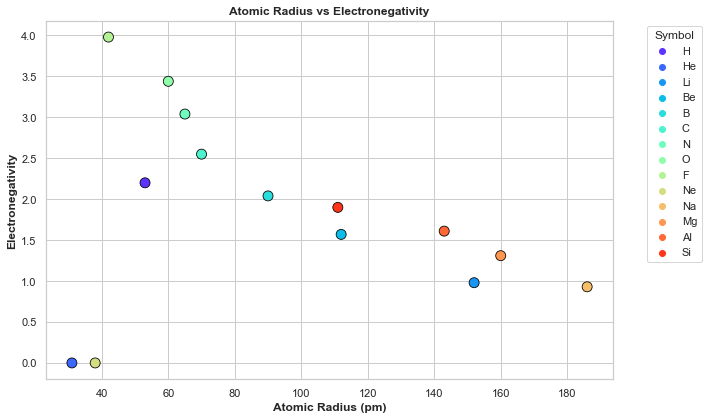

In [24]:


# Create a scatter plot using seaborn, coloring by the symbol
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=periodic_table_df,
    x='atomic_radius',
    y='electronegativity',
    hue='symbol',
    palette='rainbow',
    s=100,  # Size of the points
    edgecolor='black'
)

# Add labels and title
plt.xlabel('Atomic Radius (pm)', fontweight='bold')
plt.ylabel('Electronegativity', fontweight='bold')
plt.title('Atomic Radius vs Electronegativity', fontweight='bold')

# Add a legend with atomic symbols
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


## PAUSE: what observations can you make from this plot? 

## NEXT: continue to visualize trends- atomic radius vs ionization energy 

In [31]:

# Ensure all values in 'ionization_energies' column are strings
periodic_table_df['ionization_energies'] = periodic_table_df['ionization_energies'].astype(str)

# Function to extract ionization energies
def extract_ionization_energies(text):
    # Extracting numeric values
    first = re.search(r'1st:\s*([\d.]+)', text)
    second = re.search(r'2nd:\s*([\d.]+)', text)
    third = re.search(r'3rd:\s*([\d.]+)', text)
    
    # Return values as a dictionary
    return {
        '1st': float(first.group(1)) if first else None,
        '2nd': float(second.group(1)) if second else None,
        '3rd': float(third.group(1)) if third else None
    }

# Apply the extraction function to the DataFrame
extracted_energies = periodic_table_df['ionization_energies'].apply(extract_ionization_energies)

# Create separate columns for each ionization energy
periodic_table_df[['1st', '2nd', '3rd']] = pd.DataFrame(extracted_energies.tolist(), index=periodic_table_df.index)

# Display the DataFrame
print(periodic_table_df)


    number       name symbol  \
0        1   Hydrogen      H   
1        2     Helium     He   
2        3    Lithium     Li   
3        4  Beryllium     Be   
4        5      Boron      B   
5        6     Carbon      C   
6        7   Nitrogen      N   
7        8     Oxygen      O   
8        9   Fluorine      F   
9       10       Neon     Ne   
10      11     Sodium     Na   
11      12  Magnesium     Mg   
12      13   Aluminum     Al   
13      14    Silicon     Si   

                                     element_category  atomic_number  \
0                                   diatomic nonmetal              1   
1                                           noble gas              2   
2                                        alkali metal              3   
3                                alkaline earth metal              4   
4                                           metalloid              5   
5   polyatomic nonmetal, sometimes considered a me...              6   
6              

## PAUSE: what is ionization energy? Sketch what you predict the visalization of atomic radius vs ionization energy should look like-- be sure to consider 1st, 2nd, and 3rd ionization energies!

## NEXT: now we can build a visualization: 

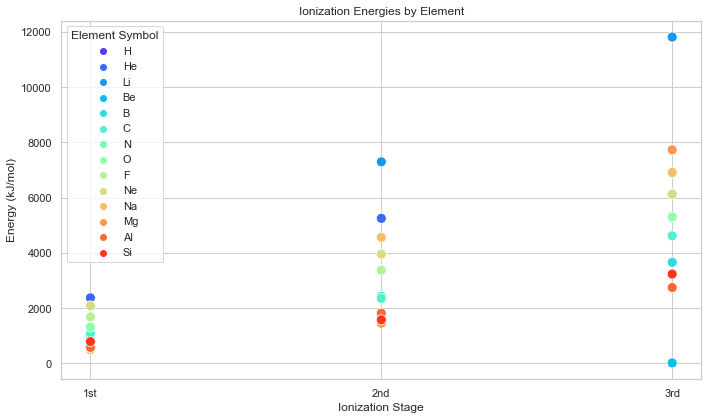

In [33]:

# Melt the DataFrame to long format for easy plotting
periodic_table_df_melted = periodic_table_df.melt(id_vars='symbol', 
                                                  value_vars=['1st', '2nd', '3rd'],
                                                  var_name='Ionization Stage', 
                                                  value_name='Energy')

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=periodic_table_df_melted, 
                x='Ionization Stage', 
                y='Energy', 
                hue='symbol', 
                palette='rainbow',
                s=100)

# Customize the plot
plt.title('Ionization Energies by Element')
plt.xlabel('Ionization Stage')
plt.ylabel('Energy (kJ/mol)')
plt.legend(title='Element Symbol')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


what if we change the plot to learn more about just the first ionization energy? 

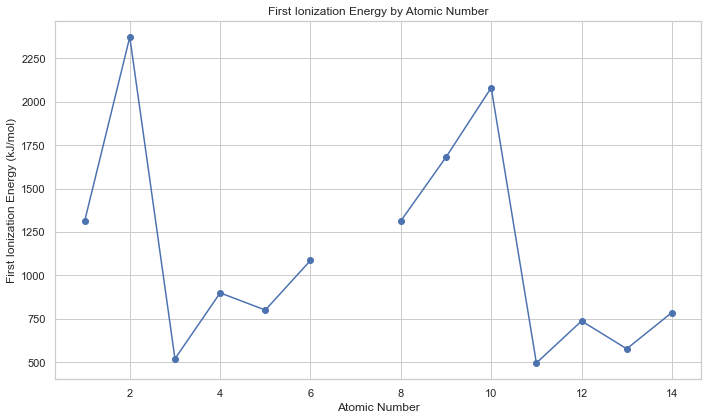

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(periodic_table_df['atomic_number'],
         periodic_table_df['1st'], 
         marker='o', 
         linestyle='-', 
         color='b')

# Customize the plot
plt.title('First Ionization Energy by Atomic Number')
plt.xlabel('Atomic Number')
plt.ylabel('First Ionization Energy (kJ/mol)')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


boring colors, lets color by element again!

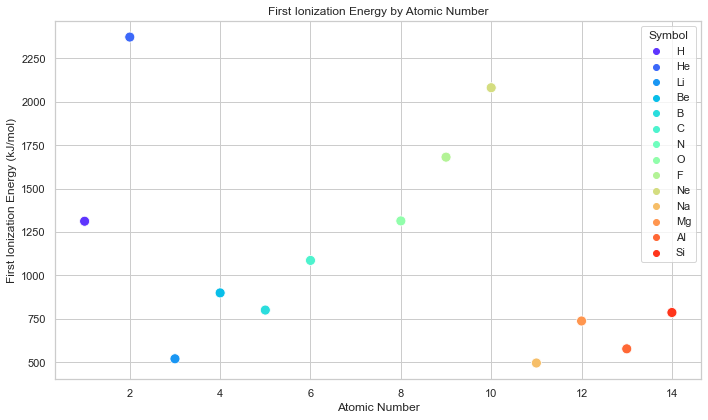

In [38]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=periodic_table_df,
    x='atomic_number',
    y='1st',
    hue='symbol',  # Color by symbol
    palette='rainbow',  # Choose a color palette
    s=100,  # Size of the points
    marker='o'
)

# Customize the plot
plt.title('First Ionization Energy by Atomic Number')
plt.xlabel('Atomic Number')
plt.ylabel('First Ionization Energy (kJ/mol)')
plt.legend(title='Symbol')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


## CHALLENGE: what other plots can we make with the dataset? Use the template below to build your own!

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=periodic_table_df_melted, 
                x='     ',  # pick what you want to plot! 
                y='     ', 
                hue='symbol', 
                palette='rainbow',
                s=100)

# Customize the plot
plt.title('     ')  # give your plot a descriptive title 
plt.xlabel('    ')  # label your axes accordingly!
plt.ylabel('    ')
plt.legend(title='Element Symbol')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
